<h1 style="color:aqua; font-size:24px;">Problem Komiwojażera - projekt nr 2</h1>
<h1 style="color:yellow; font-size:30px;">Algorytm Mrówkowy</h1>
<h1 style="color:white; font-size:24px;">Piotr Włostek</h1>
<h1 style="color:orange; font-size:24px;">259443</h1>


In [1317]:
import random
import matplotlib.pyplot as plt
from statistics import mean
from copy import copy



In [1318]:
alphabet = 'ABCDEFGHIJKLMNOPQRSTUVWXYZ1234567890!@#$%^&*()_-+='

In [1319]:
def full_graph(n):
    vertices = list(alphabet)[:n] 
    graph = {}
    for vertex in vertices:
        edges = [v for v in vertices if v != vertex]
        graph[vertex] = edges
    return graph

In [1320]:

def generate_n_points_in_given_range(n, xRange = [-100, 100], yRange = [-100, 100]):
    points = {}
    for i in range(n):
        x = random.randint(xRange[0], xRange[1])
        y = random.randint(yRange[0], yRange[1])
        points[alphabet[i]] = [x,y]
    return points


In [1321]:
def generate_graph_with_n_coords(n):
    return [full_graph(n), generate_n_points_in_given_range(n)]


all = generate_graph_with_n_coords(20)
graph, points = all

In [1322]:
for point, coords in points.items():
   x, y = coords
   print(f"{point}: ({x}, {y})")


A: (53, -54)
B: (-52, 55)
C: (-78, 13)
D: (80, 5)
E: (67, 71)
F: (28, -17)
G: (27, 60)
H: (2, 35)
I: (25, 25)
J: (56, 38)
K: (77, 8)
L: (-67, -26)
M: (-49, 55)
N: (5, -61)
O: (-95, -84)
P: (16, 62)
Q: (65, 57)
R: (5, -13)
S: (-67, -6)
T: (-78, -8)


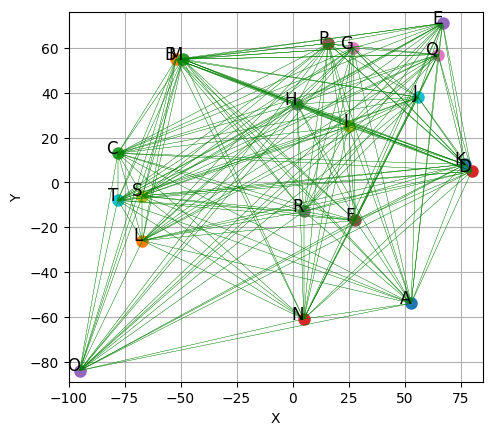

In [1323]:
def draw_graph(points, line_width):
    fig, ax = plt.subplots()
    for point, coords in points.items():
        ax.plot(coords[0], coords[1], 'o', markersize=8, label=point)
        ax.text(coords[0], coords[1], point, fontsize=12, ha='right')
    for u in points:
        for v in points:
            if u != v:
                ax.plot([points[u][0], points[v][0]], [points[u][1], points[v][1]], '-', color='green', linewidth=line_width)
    ax.set_xlim(min(p[0] for p in points.values()) - 5, max(p[0] for p in points.values()) + 5)
    ax.set_ylim(min(p[1] for p in points.values()) - 5, max(p[1] for p in points.values()) + 5)

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    plt.grid(True)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.show()

# Wywołanie funkcji do rysowania grafu
draw_graph(points, 0.2)

In [1324]:
def distance(P,Q):
    return ((P[0]-Q[0])**2+(P[1]-Q[1])**2)**(1/2)

In [1325]:
def distances(points):
    distance_dict = {}
    for node1 in points.keys():
        for node2 in points.keys():
            if(node1 != node2):
                distance_dict[(node1,node2)] = [distance(points[node1],points[node2]),1] #na każdej krawędzi początkowo będzie określona ilość feromonu
    return distance_dict

distances_dict = distances(points)


In [1326]:
distances_dict

{('A', 'B'): [151.34728276384746, 1],
 ('A', 'C'): [147.13938969562162, 1],
 ('A', 'D'): [64.88451279003334, 1],
 ('A', 'E'): [125.78155667664477, 1],
 ('A', 'F'): [44.654227123532216, 1],
 ('A', 'G'): [116.92732785794773, 1],
 ('A', 'H'): [102.57680049601859, 1],
 ('A', 'I'): [83.81527307120105, 1],
 ('A', 'J'): [92.04890004774636, 1],
 ('A', 'K'): [66.48308055437865, 1],
 ('A', 'L'): [123.2233744059949, 1],
 ('A', 'M'): [149.2816130673835, 1],
 ('A', 'N'): [48.507731342539614, 1],
 ('A', 'O'): [151.00993344810135, 1],
 ('A', 'P'): [121.75795661885921, 1],
 ('A', 'Q'): [111.64676439557037, 1],
 ('A', 'R'): [63.12685640834652, 1],
 ('A', 'S'): [129.24395537122808, 1],
 ('A', 'T'): [138.84163640637487, 1],
 ('B', 'A'): [151.34728276384746, 1],
 ('B', 'C'): [49.39635614091387, 1],
 ('B', 'D'): [141.1523999087511, 1],
 ('B', 'E'): [120.07081243999309, 1],
 ('B', 'F'): [107.62899237658968, 1],
 ('B', 'G'): [79.1580697086532, 1],
 ('B', 'H'): [57.584720195551874, 1],
 ('B', 'I'): [82.637763

In [1327]:
def get_path_length(path, dist_dict):
    d = 0
    for i in range(len(path)-1):
        node1 = path[i]
        node2 = path[i+1]
        d += dist_dict[(node1,node2)][0]
    return d

Algorytm mrówkowy

In [1328]:
def choose_path(possible_paths, distances_dict):
    pheromones = []
    for path in possible_paths:
        pheromones.append(distances_dict[path][1])
    return random.choices(possible_paths, weights=pheromones)[0]

In [1329]:
def single_ant_journey(starter_node, distances_dict, points):
    visited = [starter_node]
    edges = list(distances_dict.keys())
    while len(visited) != len(points):
        possible_paths = [(P, Q) for edge in edges for P in edge[0] for Q in edge[1] if Q not in visited and P in visited[len(visited)-1]]
        chosen_path = choose_path(possible_paths, distances_dict)
        visited.append(chosen_path[1])
    visited.append(starter_node)
    return visited

In [1330]:
num_of_ants = 24
def send_ants_for_journey(num_of_ants, starter_node, distances_dict, points = list(points.keys())):
    paths_accomplished = []
    for _ in range(num_of_ants):
        path = single_ant_journey(starter_node, distances_dict, points)
        distance = get_path_length(path, distances_dict)
        paths_accomplished.append([path, distance])
    return sorted(paths_accomplished, key=lambda p: p[1])


In [1331]:
def distribute_amount_of_pheromones_on_given_path(amount_of_pheromones, path, dist_dict):
    amount_of_pheromones_for_single_edge = amount_of_pheromones/(len(path)-1)
    for i in range(len(path)-1):
        curr_vertex = path[i]
        next_vertex = path[i+1]
        edge = (curr_vertex, next_vertex)
        edge_back = (next_vertex, curr_vertex)
        distance, pheromones = distances_dict[edge]
        pheromones += amount_of_pheromones_for_single_edge
        dist_dict[edge] = [distance,pheromones]
        dist_dict[edge_back] = [distance,pheromones]


In [1332]:
def avg_of_distances(journeys):
    return mean([el[1] for el in journeys])

def assigned_pheromones_for_path(path_distance, avg):
    return (avg/path_distance)**9

In [1333]:
def vaporize_pheromones_on_every_path(evaporation_rate, dist_dict):
    for edge in dist_dict:
        distance, pheromones = dist_dict[edge]
        dist_dict[edge] = [distance, evaporation_rate*pheromones]

In [1334]:
def ants_are_going_through_same_path(num_of_ants, journeys):
    count = 1
    for i in range(1, len(journeys)):
        if journeys[i][0] == journeys[i - 1][0] or journeys[i][0] == journeys[i - 1][0][::-1]:
            count += 1
            if count == num_of_ants//2+1:
                return True
        else:
            count = 1  

    return False
    

In [1335]:
distances_dict

{('A', 'B'): [151.34728276384746, 1],
 ('A', 'C'): [147.13938969562162, 1],
 ('A', 'D'): [64.88451279003334, 1],
 ('A', 'E'): [125.78155667664477, 1],
 ('A', 'F'): [44.654227123532216, 1],
 ('A', 'G'): [116.92732785794773, 1],
 ('A', 'H'): [102.57680049601859, 1],
 ('A', 'I'): [83.81527307120105, 1],
 ('A', 'J'): [92.04890004774636, 1],
 ('A', 'K'): [66.48308055437865, 1],
 ('A', 'L'): [123.2233744059949, 1],
 ('A', 'M'): [149.2816130673835, 1],
 ('A', 'N'): [48.507731342539614, 1],
 ('A', 'O'): [151.00993344810135, 1],
 ('A', 'P'): [121.75795661885921, 1],
 ('A', 'Q'): [111.64676439557037, 1],
 ('A', 'R'): [63.12685640834652, 1],
 ('A', 'S'): [129.24395537122808, 1],
 ('A', 'T'): [138.84163640637487, 1],
 ('B', 'A'): [151.34728276384746, 1],
 ('B', 'C'): [49.39635614091387, 1],
 ('B', 'D'): [141.1523999087511, 1],
 ('B', 'E'): [120.07081243999309, 1],
 ('B', 'F'): [107.62899237658968, 1],
 ('B', 'G'): [79.1580697086532, 1],
 ('B', 'H'): [57.584720195551874, 1],
 ('B', 'I'): [82.637763

In [1336]:
epoche = 0
dicts = []

journeys_accomplished = send_ants_for_journey(200, 'A', distances_dict)

while not ants_are_going_through_same_path(num_of_ants, journeys_accomplished):
    epoche += 1
    dicts.append((copy(distances_dict), journeys_accomplished[0]))   
    avg = avg_of_distances(journeys_accomplished)
    for journey in journeys_accomplished:
        path_distance = journey[1]
        pheromones_for_path = assigned_pheromones_for_path(path_distance, avg)
        distribute_amount_of_pheromones_on_given_path(pheromones_for_path, journey[0], distances_dict)
    vaporize_pheromones_on_every_path(0.2, distances_dict)
    if epoche > 2000:
        break
    journeys_accomplished = send_ants_for_journey(num_of_ants, 'A', distances_dict)



In [1337]:
def nodes_to_edges(path):
    return [(path[i], path[i+1]) for i in range(len(path) - 1)]

def draw_graph(points, distances_dict, ax, epoche, path, summary=False):
    if summary:
        edge_list = nodes_to_edges(path)
    else:
        edge_list = []
    for point, coords in points.items():
        ax.plot(coords[0], coords[1], 'o', markersize=8)
        ax.text(coords[0], coords[1] + 2, point, fontsize=12, ha='center')

    for (u, v), (distance, pheromone) in distances_dict.items():
        if u in points and v in points:
            line_width = pheromone*3  
            if (u, v) in edge_list or (v, u) in edge_list:
                color = 'green' 
                line_width = 4
            else:
                color = 'red'

            ax.plot([points[u][0], points[v][0]], [points[u][1], points[v][1]], '-', color=color, linewidth=line_width)

    # Ustawienie zakresu osi
    ax.set_xlim(min(p[0] for p in points.values()) - 10, max(p[0] for p in points.values()) + 10)
    ax.set_ylim(min(p[1] for p in points.values()) - 10, max(p[1] for p in points.values()) + 10)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_title(f"Epoche: {epoche}, Shortest path: {path}")

In [1338]:
len(dicts)


310

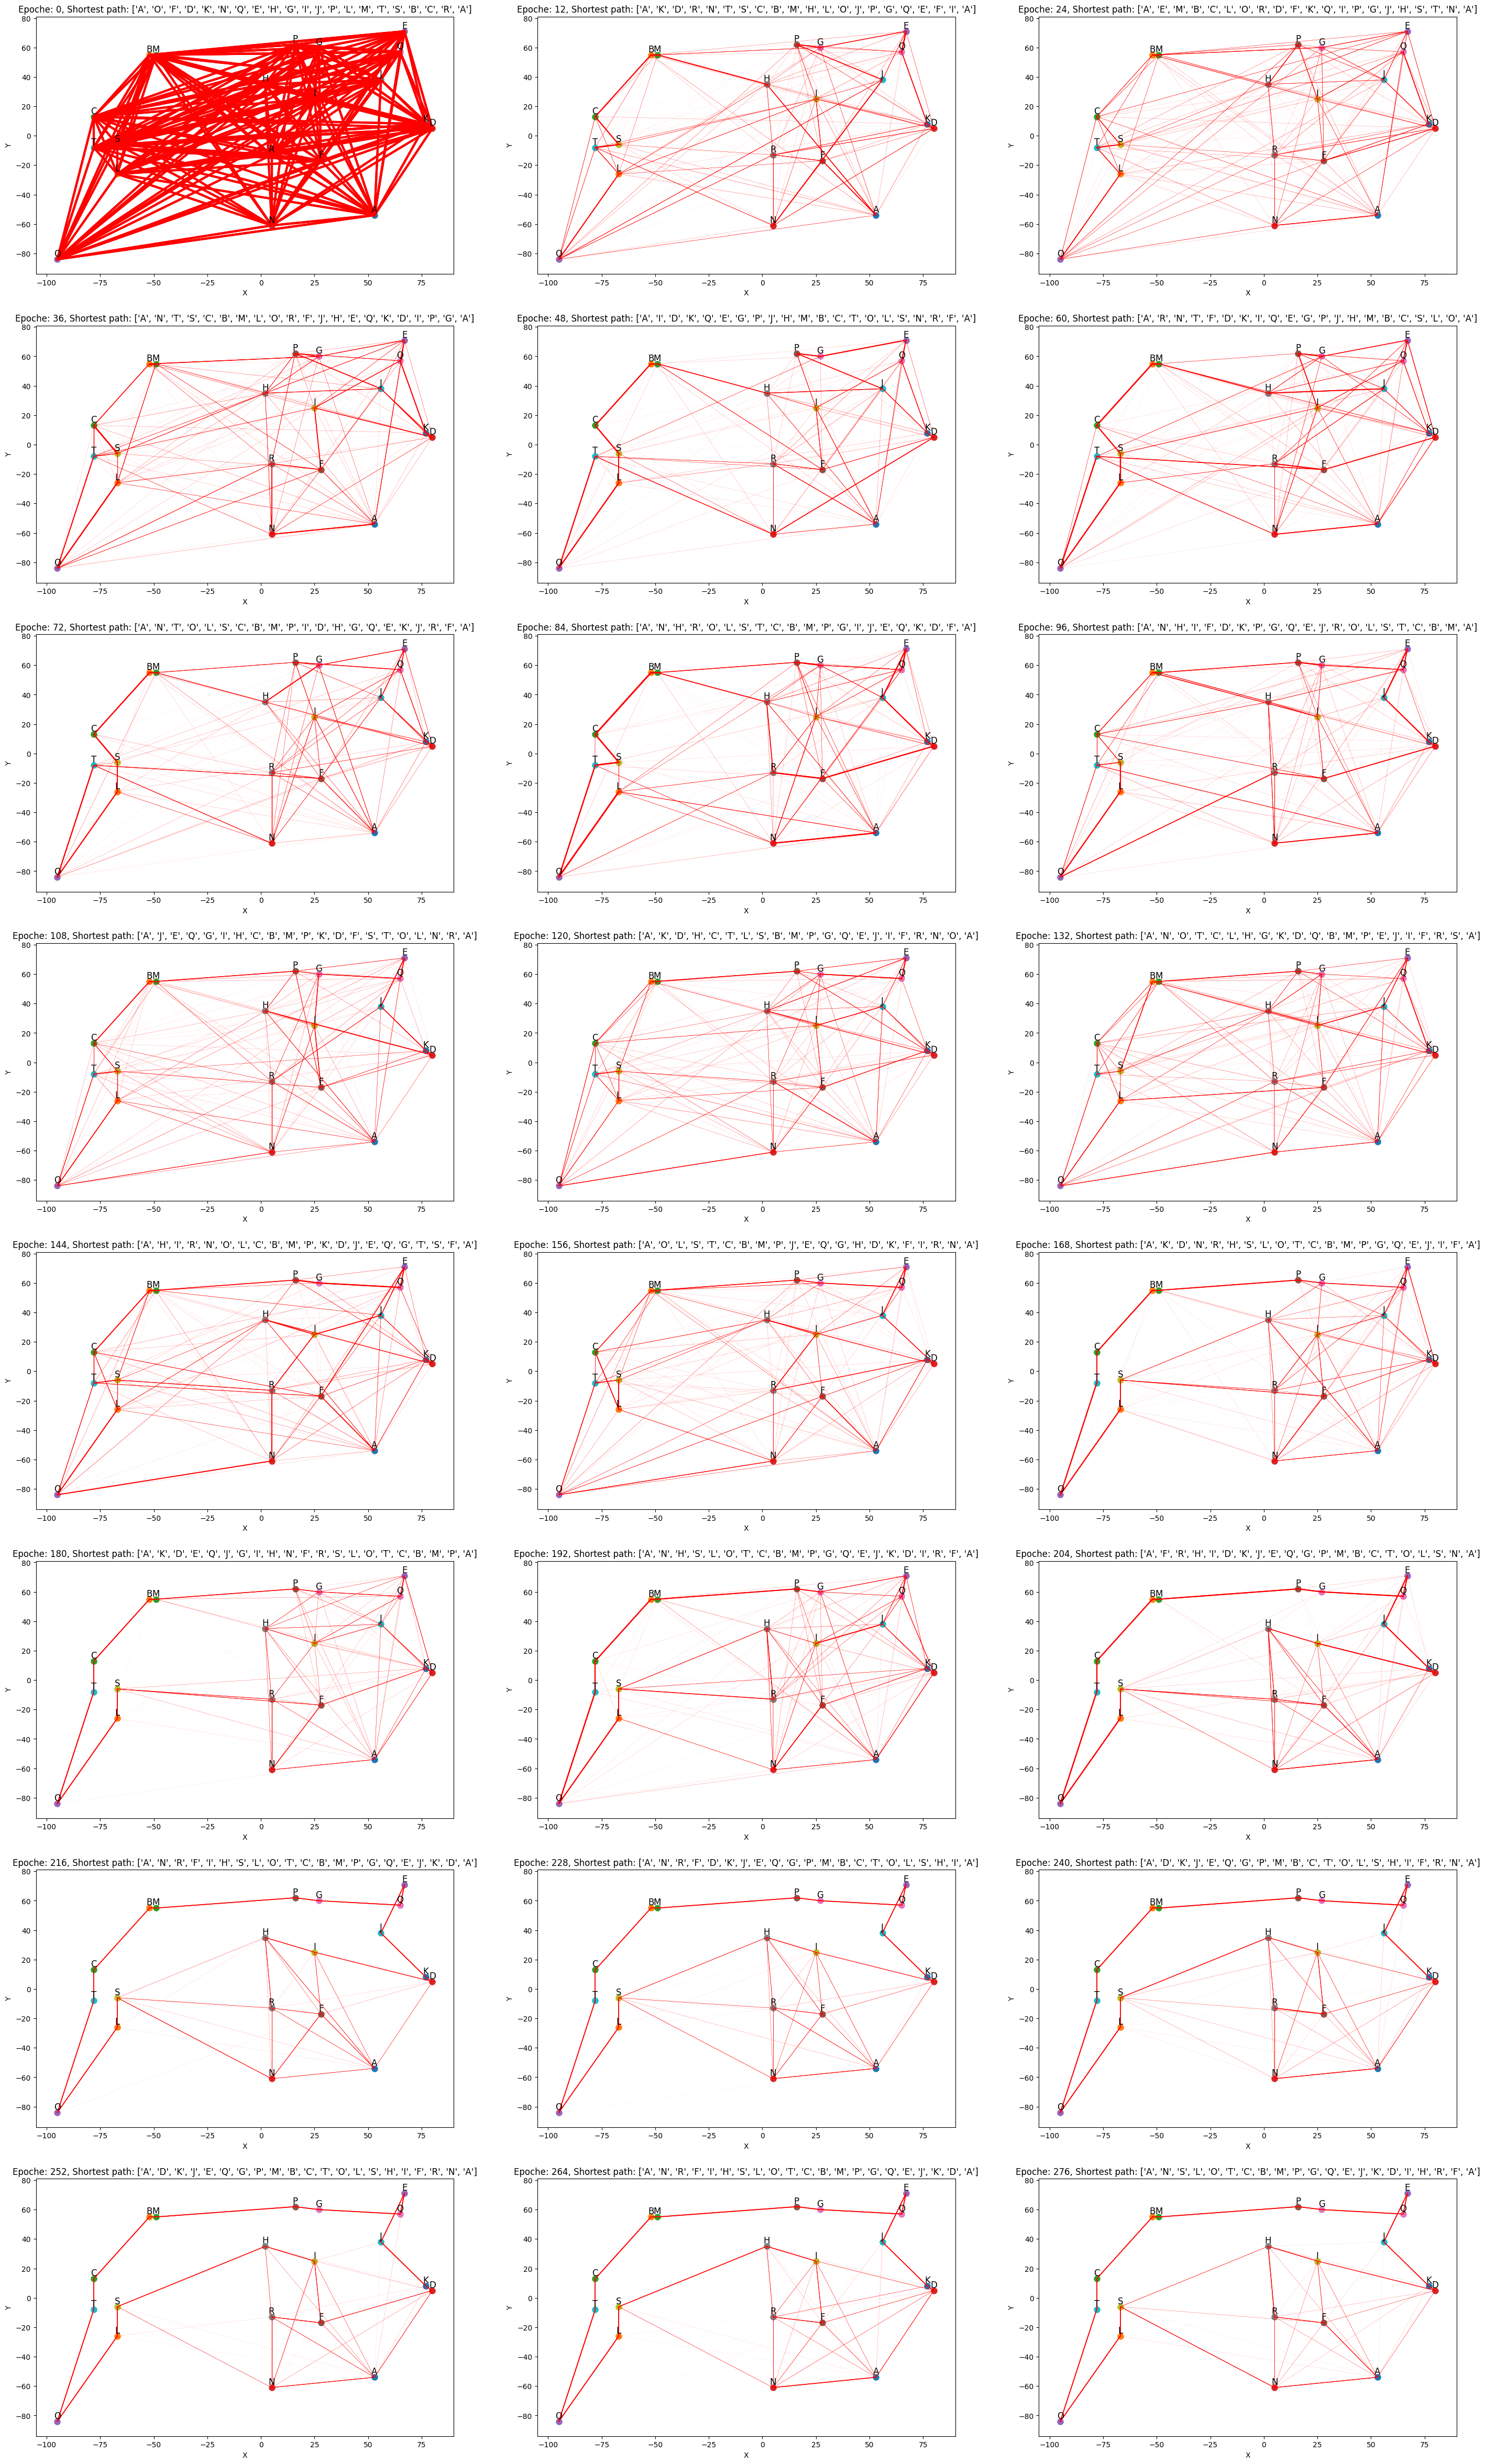

In [1339]:
def summary_plots(dist_dicts):
    fig, axes = plt.subplots(8, 3, figsize=(35,60)) 
    epoches = len(dist_dicts)
    n = epoches//24
    r = epoches%24
    for i in range(epoches-r):
        if i % n == 0:  
            y = i // n 
            x = y // 3   
            y = y % 3 
            ax = axes[x,y]
            draw_graph(points, dist_dicts[i][0], ax, i, dist_dicts[i][1][0])
            

summary_plots(dicts)
    


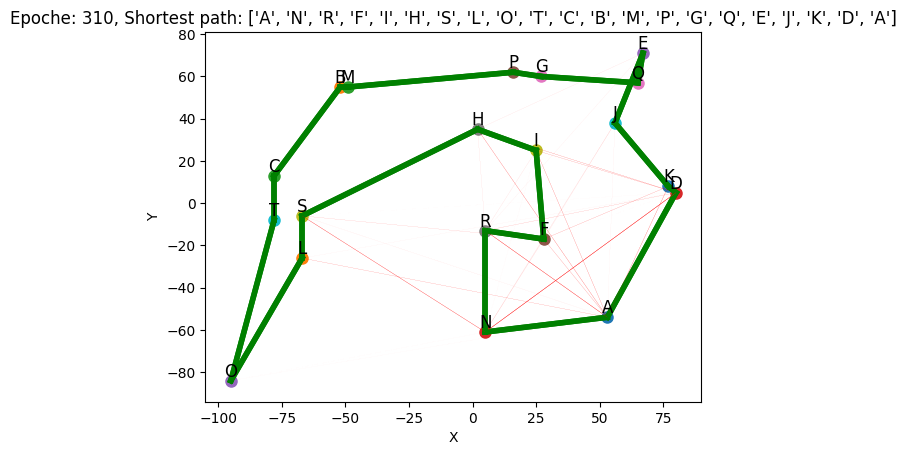

In [1340]:
fig, ax = plt.subplots()
last_epoche = len(dicts)
path = dicts[last_epoche-1][1][0]
draw_graph(points, distances_dict, ax, epoche, path, True)